## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

## Data import and structure investigation

In [2]:
#Loading dataset
df=pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Check number of data rows
df.shape

(1460, 81)

In [4]:
#check column types
pd.value_counts(df.dtypes)

object     43
int64      35
float64     3
dtype: int64

We have numerical and non numerical features in the data. Let's start with inspection of the non-numerical ones. They are listed as object type, so let's look what kind of the data do they really represent?

#### Inspecting non-numerical data

In [5]:
#Inspect which columns are of object type
pd.set_option('display.max_columns', 90)
print(df.select_dtypes(exclude="number"))

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition

It seems that all the data categorized as object are in fact string, so let's switch them to string (as should be)

In [6]:
#Switching data types
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = pd.Series(df[col], dtype="string")
        
pd.value_counts(df.dtypes)

string     43
int64      35
float64     3
dtype: int64

In [7]:
#investigate uniqe values for each non-numerical data
df.describe(exclude="number")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Some of the features are apparently missing data (like Alley - only 91 entries out of 1460, PoolQc - only 7 out of 1460) and are first in line for dropping out. For others we have a dominant that covers almost all of the cases (like street: 1454 out of 1460 or utilities: 1459 out of 1460) - they are also candidates for dropping as they won't explain much in data.

#### Inspecting numerical data

<AxesSubplot:title={'center':'Unique values per feature'}>

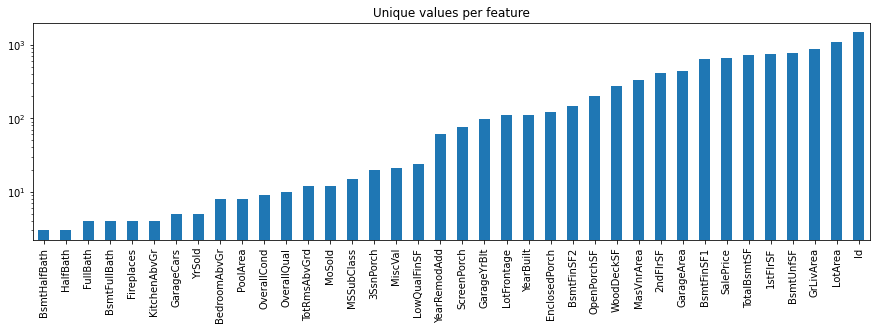

In [8]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

There is a number of features that don't have many unique values (below 10 categories, ex. HalfBath) and maybe should be considered as nominal rather than numeric in later analyses. 

### Quality investigation

#### Duplicates investigation

In [9]:
n_duplicates = df.drop(labels=["Id"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


We don't have duplicates (based on ID, we assume that two different hauses wouldn't be given the same ID)

#### Missing values - per sample and per feature

##### Identify the cases

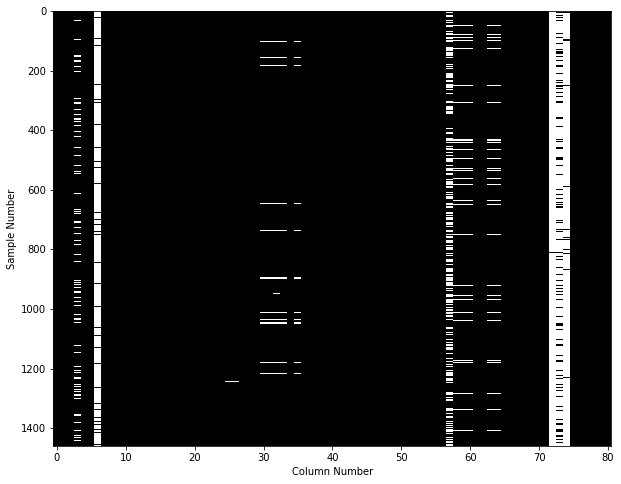

In [10]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

Y-axis shows individual samples, x-axis consequitive features. Apparently there are some features with a lot of missing values, and some of the records with a higher number of missing values. Let's see it more precisely:

<AxesSubplot:>

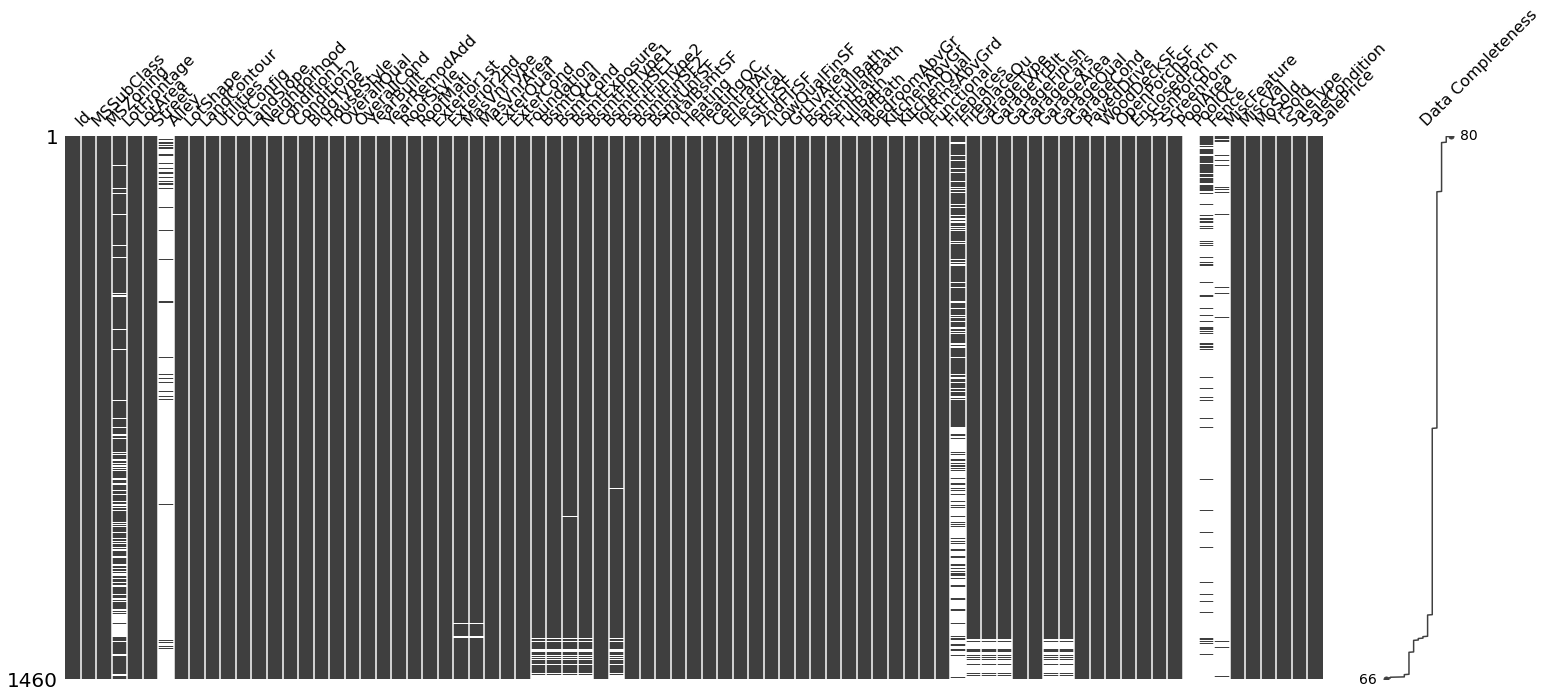

In [11]:
msno.matrix(df, labels=True, sort="descending")

The plot shows that all the cases have at least 66% (and up to 80%) of all the features. That is a good percentage and suggests rather inserting missing values, than dropping cases.

When inspectiong the features we see that the missing values correspond mostly to columns:
- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature

These columns are first to be dropped. Let's confirm it with another plot:

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

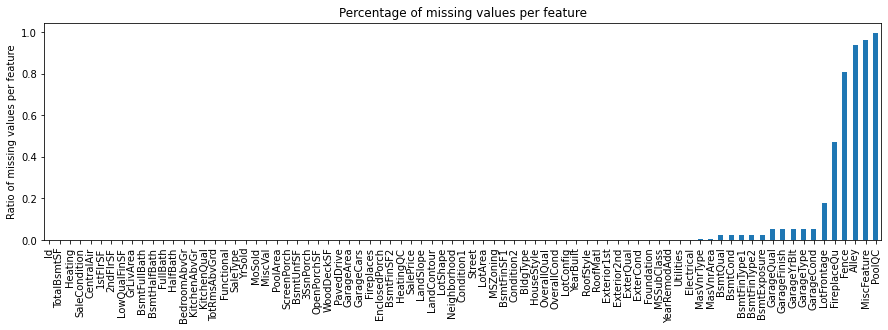

In [12]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

Indeed we indentified the features with the highest percentage of missing values. Additionally LotFrontage seems to have a lot of missing ones as well. Let's drop them all (all that have above 15% of missing values) and see the visualizations again.

##### Drop missing columns

In [13]:
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)

<AxesSubplot:>

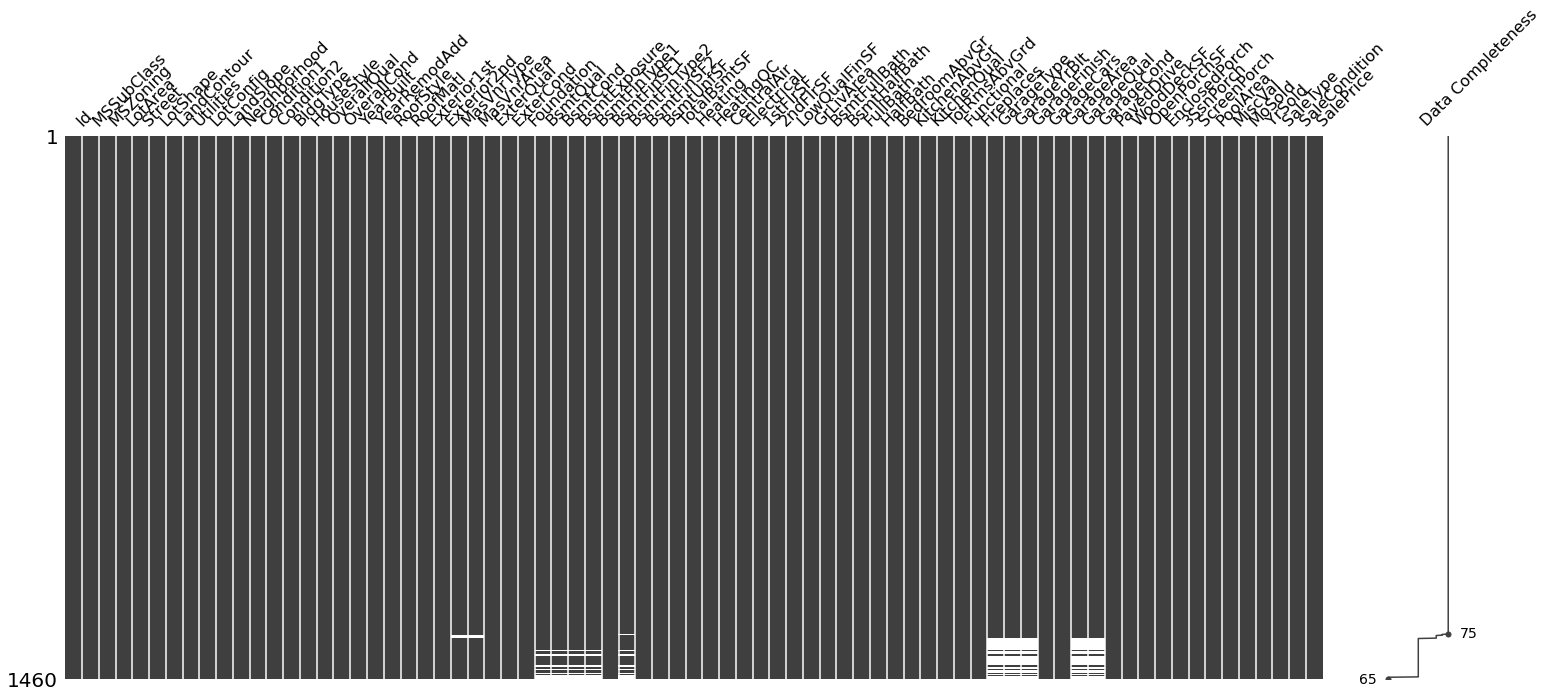

In [14]:
msno.matrix(df, labels=True, sort="descending")

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

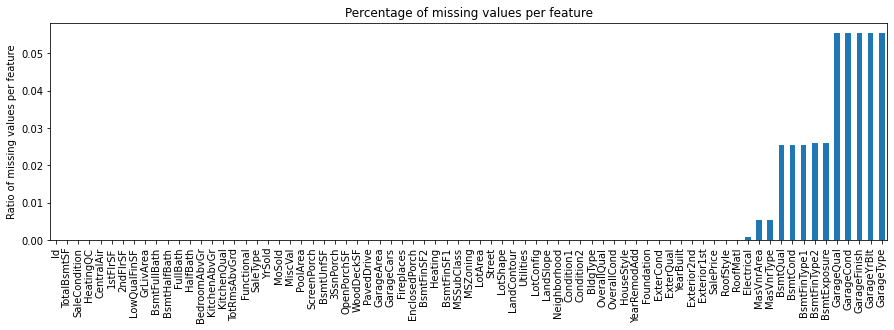

In [15]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

So now most of the data is complete. But some of the cases are still missing values. We can try imputing them.

##### Replace missing values

Let's start with checking the names and the types of the data that is missing.

In [16]:
df.columns[df.isnull().any()]

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [17]:
[type(col) for col in df.columns if df[col].isnull().any()]

[str, str, str, str, str, str, str, str, str, str, str, str, str]

We are only missing categorical data. Hence the best way would be to replace the missing values with dominant for each of the categories.

In [18]:
for column in df.columns[df.isnull().any()]:
    #print(column)
    df[column].fillna(df[column].mode()[0], inplace=True)

Let's inspect if it worked

<AxesSubplot:>

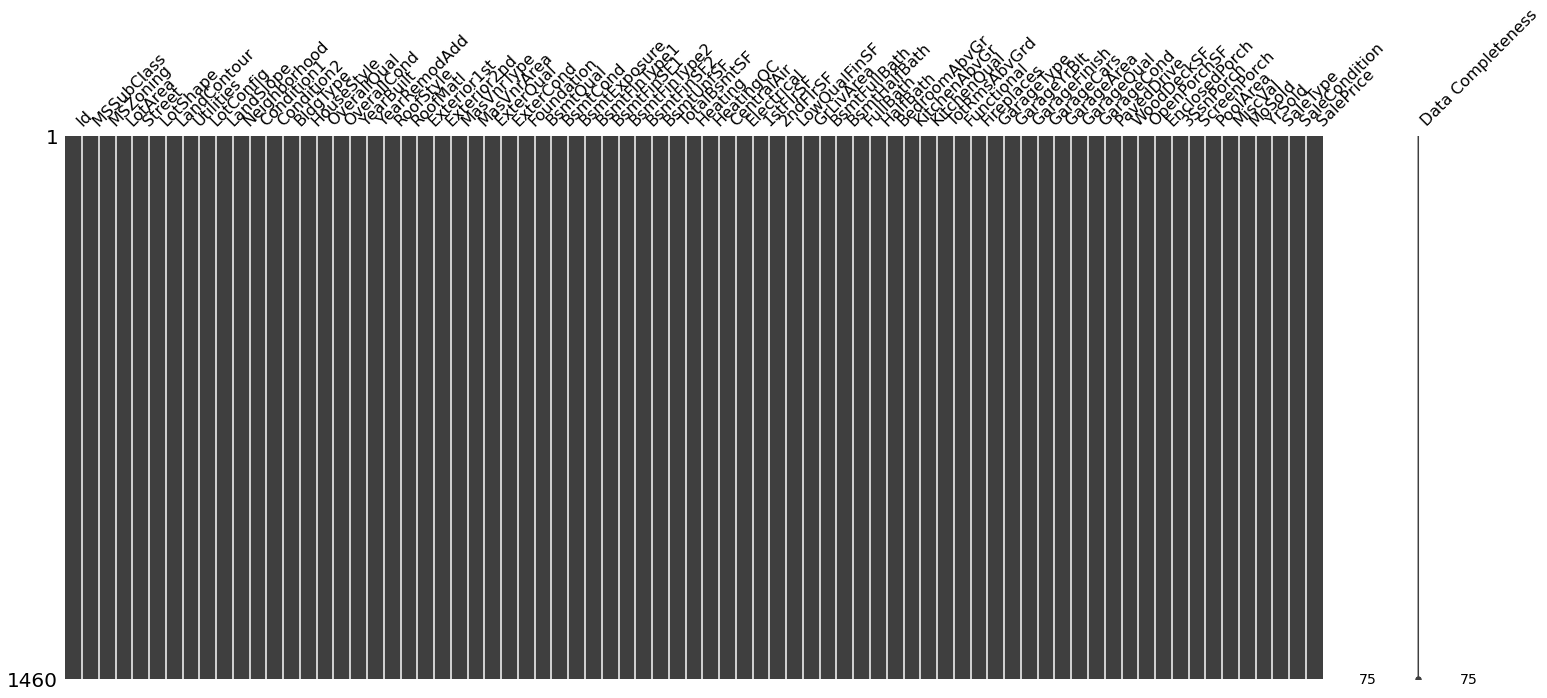

In [19]:
msno.matrix(df, labels=True, sort="descending")

Yay! Now all data is complete! We can inspect further!

### Looking for wrong entries

Let's take a global view of the features in the data set in search for unusual patterns.

#### Numerical variables

Let's plot every sample (data row on x-axis) against it's value for each of the numerical features and see what we've got.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

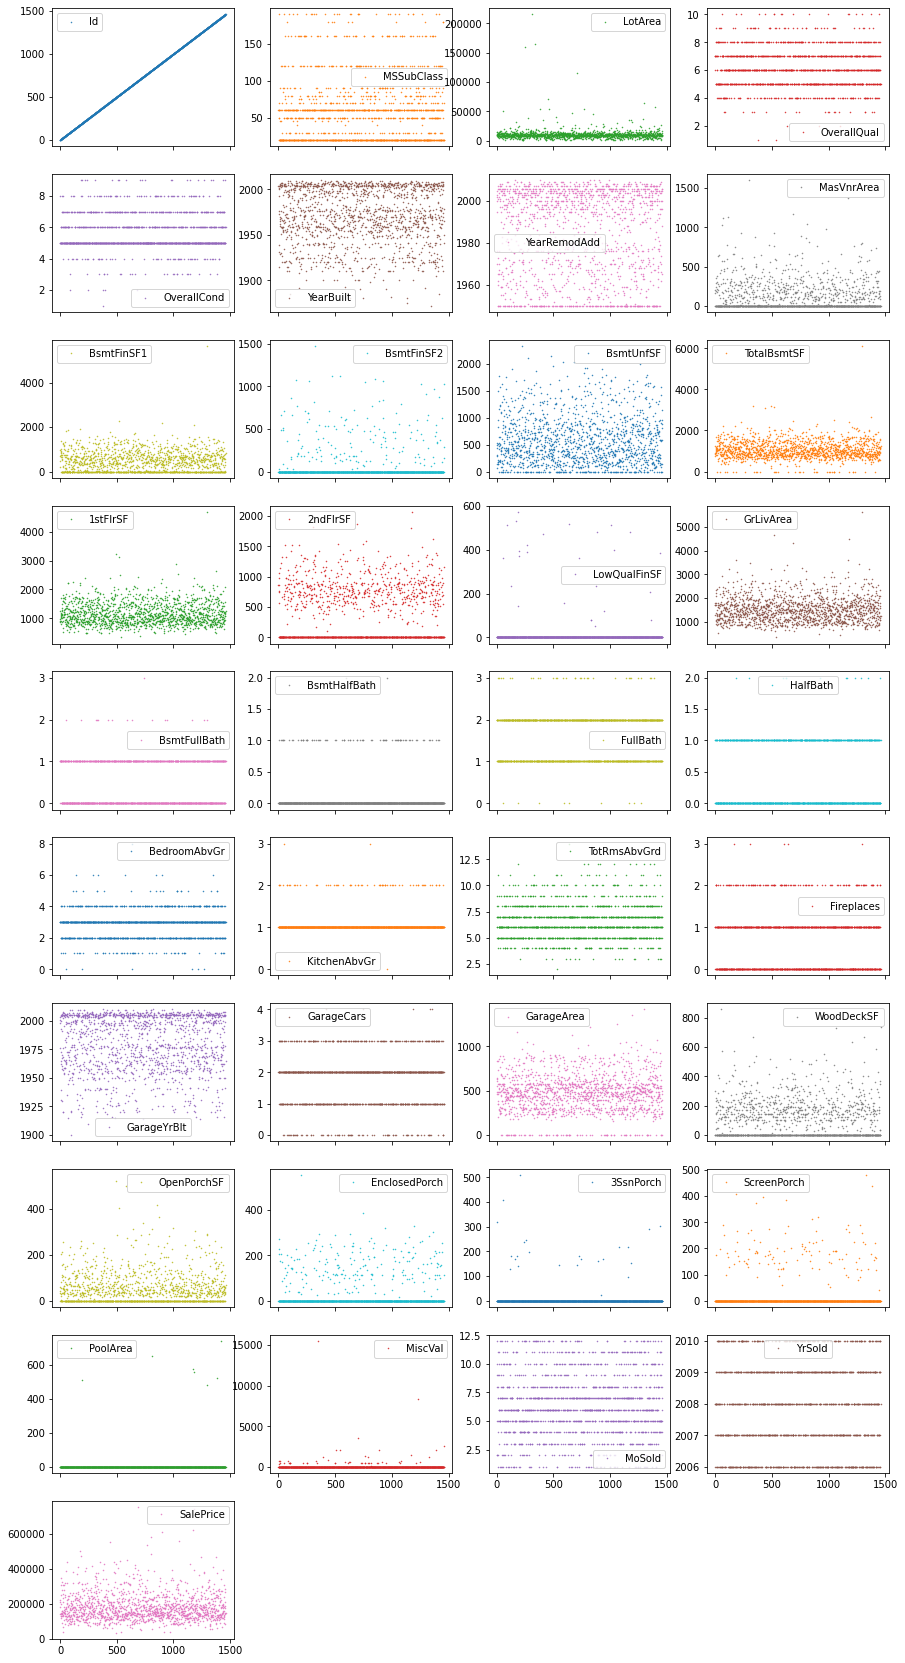

In [20]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1)

There are some interesting conlusions we can draw. First, some features are hardly differentiating between the cases (meaning most cases fall within one category/value, like LotArea or PoolArea or 3SsnPorch). We can probably exclude those from the model without a second thought. Secondly, clearly some variables (as assumed before) are ordina;/nominal rather than numeric (like YrSold, MoSold, GarageCars, and so on). We can consider performing one-hot-encoding on them later. But what's mostly striking - the data is NOT sorted by the date of transaction. The houses prices come from a span of 4 years. We can assume some sesonality in it, but what is more important - a trend (in most cases house prices will rise with time). So let's sort the cases according to year and month sold and see the visualization again.

In [21]:
df.sort_values(["YrSold", "MoSold"], inplace=True)
df.reset_index(drop=True, inplace=True)

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

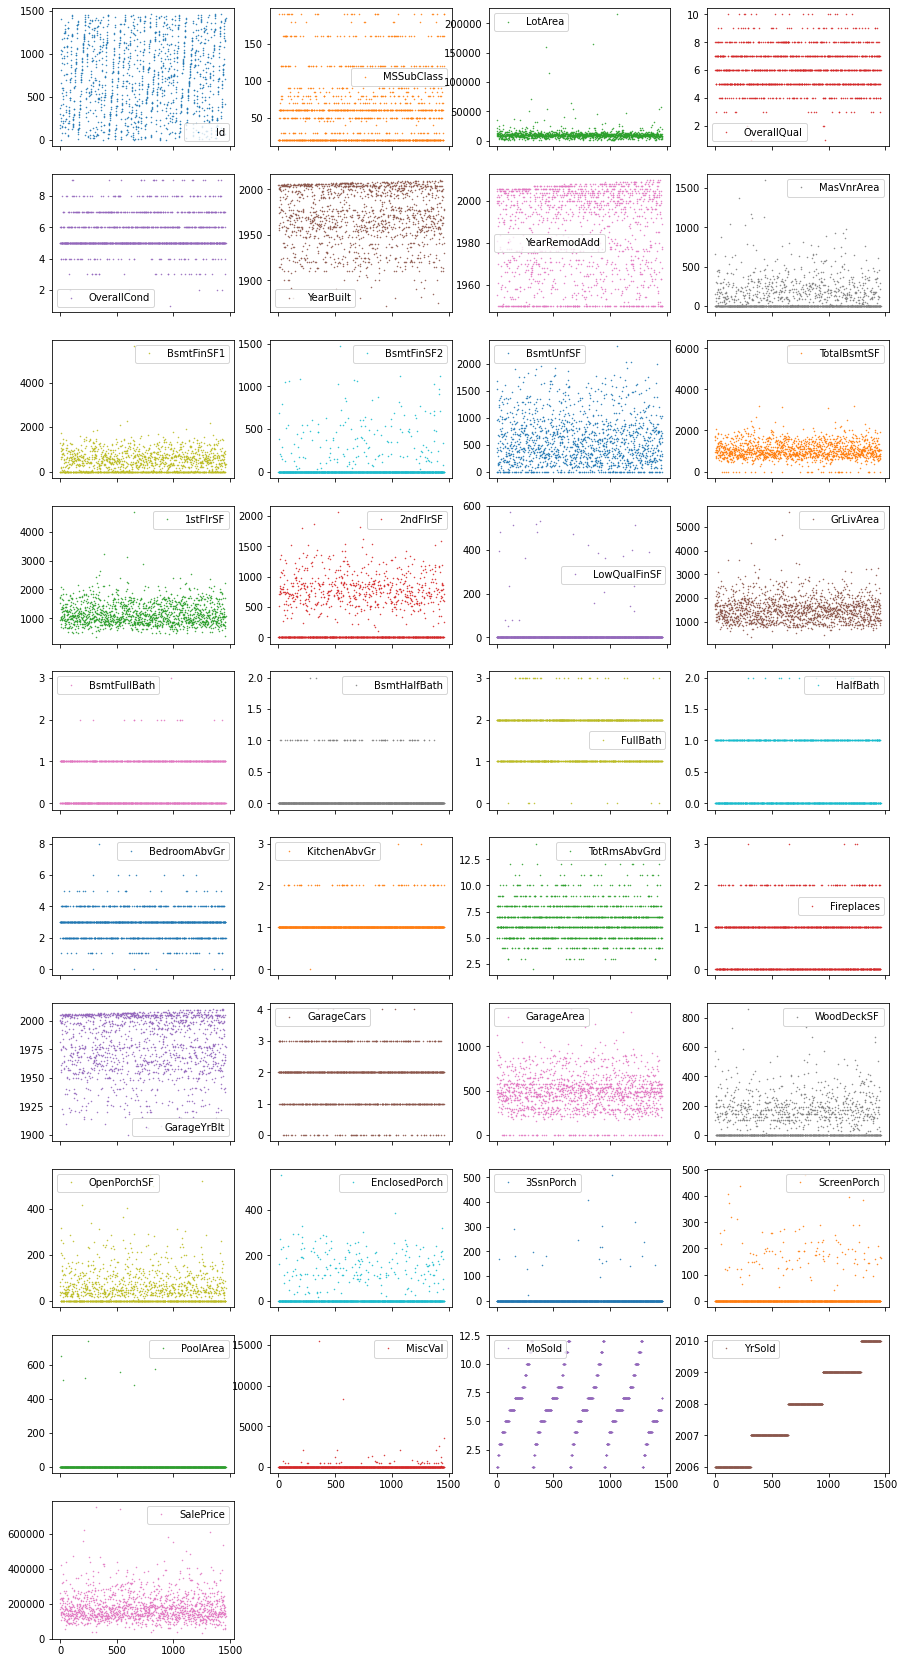

In [22]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1)

What's interesting - our assumption was wrong. We don't see that much seasonality in the SalePrice! Or in any other feature, for that matter. So maybe our model doesn't have take seasonality into account. Or maybe it does, but only after discriminating other features to divide the dataset. 
So now let's look into non-numeric variables.

#### Non-numerical variables

First let's look at the descriptives once again

In [23]:
df.describe(exclude=["number"])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,686,1348,991,467,1294,1428,741,1365,1335,735,1360,951,686,1392,1407,1340,1267,1198


We see that they vary in the number of unique values, But more importantly - in the numbers the dominant classes are represented. So let's look into that some more.

In [24]:
#let's see how many entries do we have
df.select_dtypes(exclude=["number"])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,Hip,WdShake,Plywood,Plywood,BrkFace,Gd,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2fmCon,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,Mn,Rec,Unf,GasA,TA,N,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1456,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,2Story,Hip,CompShg,VinylSd,Wd Shng,None,Fa,Fa,Slab,TA,TA,No,Unf,Unf,GasA,Fa,N,SBrkr,Fa,Mod,Attchd,Unf,TA,TA,N,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,2fmCon,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,Fa,BrkTil,Gd,TA,No,BLQ,Unf,Grav,Fa,N,FuseA,Fa,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,Gable,CompShg,Plywood,Brk Cmn,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


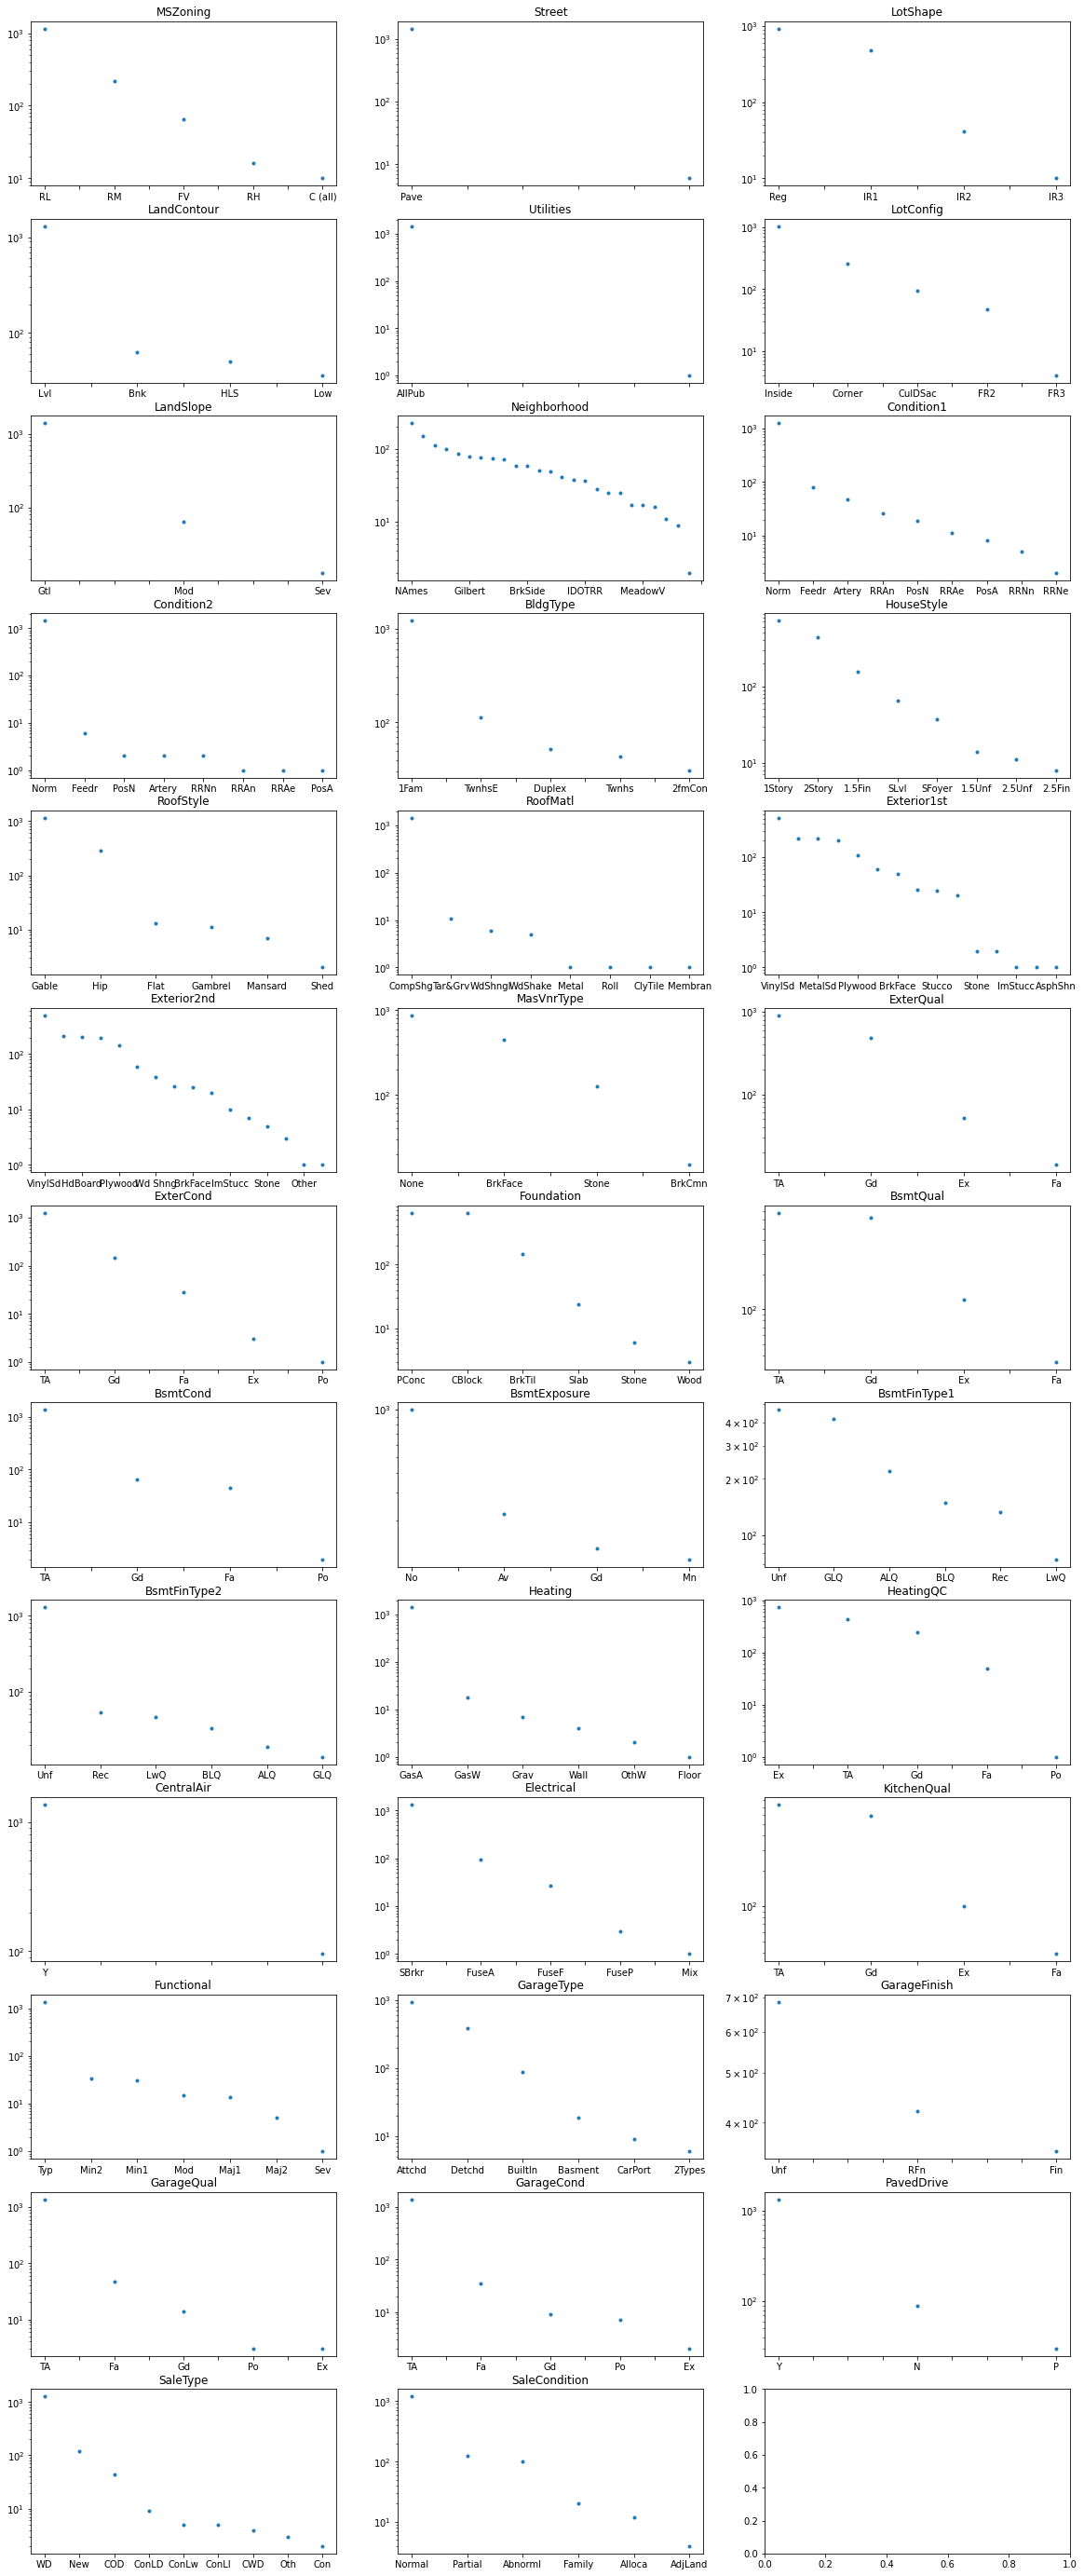

In [25]:
# Create figure object with subplots
fig, axes = plt.subplots(ncols=3, nrows=13)

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(
        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax, figsize=(20, 50))
    
plt.show()

Let's stop for a moment. Obviously there are some differences in the data. Some features' values are very rare (like Street other than pave). In other cases there are dominant values and other that maybe should be aggregated into "Other" category (like in SaleType, SaleCondition). But that depends if the mean prices are comparable.

#### Wrong entries - summary

After the inspection we have not identified any obvious wrong entries, but we did identifie a few features, which have a predominant value, therefore they won't be useful in explaining variance or building prediction models (to few cases). Let's sew which features those are.

In [26]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1460,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,872,NaN,906,1282,647,686,1348,991,467,NaN,1294,NaN,NaN,NaN,1428,741,1365,1335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,951,NaN,686,NaN,NaN,1392,1407,1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.117123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,1979.976027,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,180.731373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,24.749688,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

First let's find categorical features, which dominant value covers more than 80% cases:

In [27]:
print("The cut-off of 80% was selected arbitrally. It stands for: ", 0.8*df.shape[0], " cases falling into one category")

The cut-off of 80% was selected arbitrally. It stands for:  1168.0  cases falling into one category


Let's see if we got the indexer right:

In [28]:
df[df.columns[df.describe(include='all').loc['freq',:] > 0.8 * df.shape[0]]].describe()

,Street,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,RoofMatl,ExterCond,BsmtCond,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,2,4,2,3,9,8,5,8,5,4,6,6,2,5,7,5,5,3,9,6
top,Pave,Lvl,AllPub,Gtl,Norm,Norm,1Fam,CompShg,TA,TA,Unf,GasA,Y,SBrkr,Typ,TA,TA,Y,WD,Normal
freq,1454,1311,1459,1382,1260,1445,1220,1434,1282,1348,1294,1428,1365,1335,1360,1392,1407,1340,1267,1198


The list of the columns:

In [29]:
df.columns[df.describe(include='all').loc['freq',:] > 0.8 * df.shape[0]]

Index(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond',
       'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Now let's find which numeric variables are in fact ordinal. We'll do it by listing those, which ratio of the number of unique values to total number of values is less than 5%. Let's list all of the numeric features:

In [30]:
df.select_dtypes(include=["number"]).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Now let's mark those probably ordinal:

In [31]:
df_ordinal=[col for col in df.select_dtypes(include=["number"]).columns if 1.*df[col].nunique()/df[col].count() < 0.05]
df_ordinal

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Roughly looking at previous plots it seems our estimate is correct. And let's check in which of them the top value accounts for more than 80% of the cases:

In [32]:
top_n=1
df_ordinal_toDrop=[col for col in df.select_dtypes(include=['number']).columns if 1.*df[col].value_counts(normalize=True).head(top_n).sum() > 0.8]
df_ordinal_toDrop

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

Let's check if it matched properly:


In [33]:
for col in df_ordinal_toDrop:
    print(df[col].value_counts(normalize=True).head(1))

0    0.885616
Name: BsmtFinSF2, dtype: float64
0    0.982192
Name: LowQualFinSF, dtype: float64
0    0.943836
Name: BsmtHalfBath, dtype: float64
1    0.953425
Name: KitchenAbvGr, dtype: float64
0    0.857534
Name: EnclosedPorch, dtype: float64
0    0.983562
Name: 3SsnPorch, dtype: float64
0    0.920548
Name: ScreenPorch, dtype: float64
0    0.995205
Name: PoolArea, dtype: float64
0    0.964384
Name: MiscVal, dtype: float64


It matches. Therefore we marked both categorical and numeric variables that are first to be dropped in feature engineering.

## Feature inspection & content investigation

In previous steps we imported the data. Dropped columns with too many missing values and replaced missing entries per case. We also identified the categorical and ordinal variables which should be dropped due to not accounting for much of the variance in the dataset. So let's drop them before furhter inspection.

In [34]:
#categorical features with 80% coverage in one category
for col in df.columns[df.describe(include='all').loc['freq',:] > 0.8 * df.shape[0]]:
   df.drop(col, axis=1, inplace=True)
    
#numerical features with 80% coverage in one category
for col in df_ordinal_toDrop:
    df.drop(col, axis=1, inplace=True)
#    print(col)
    
#check
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Le't also update our list of ordinal features:

In [35]:
df_ordinal=[col for col in df.select_dtypes(include=["number"]).columns if 1.*df[col].nunique()/df[col].count() < 0.05]
df_ordinal

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

How many features do we have left?

In [36]:
df.shape

(1460, 46)

We have 44 features (excluding Id and SalePrice) and 1460 entries. Let's inspect the features further to maybe find out which ones to drop as well.

### Feature distribution

Let's start with plotting distributions for numerical data.

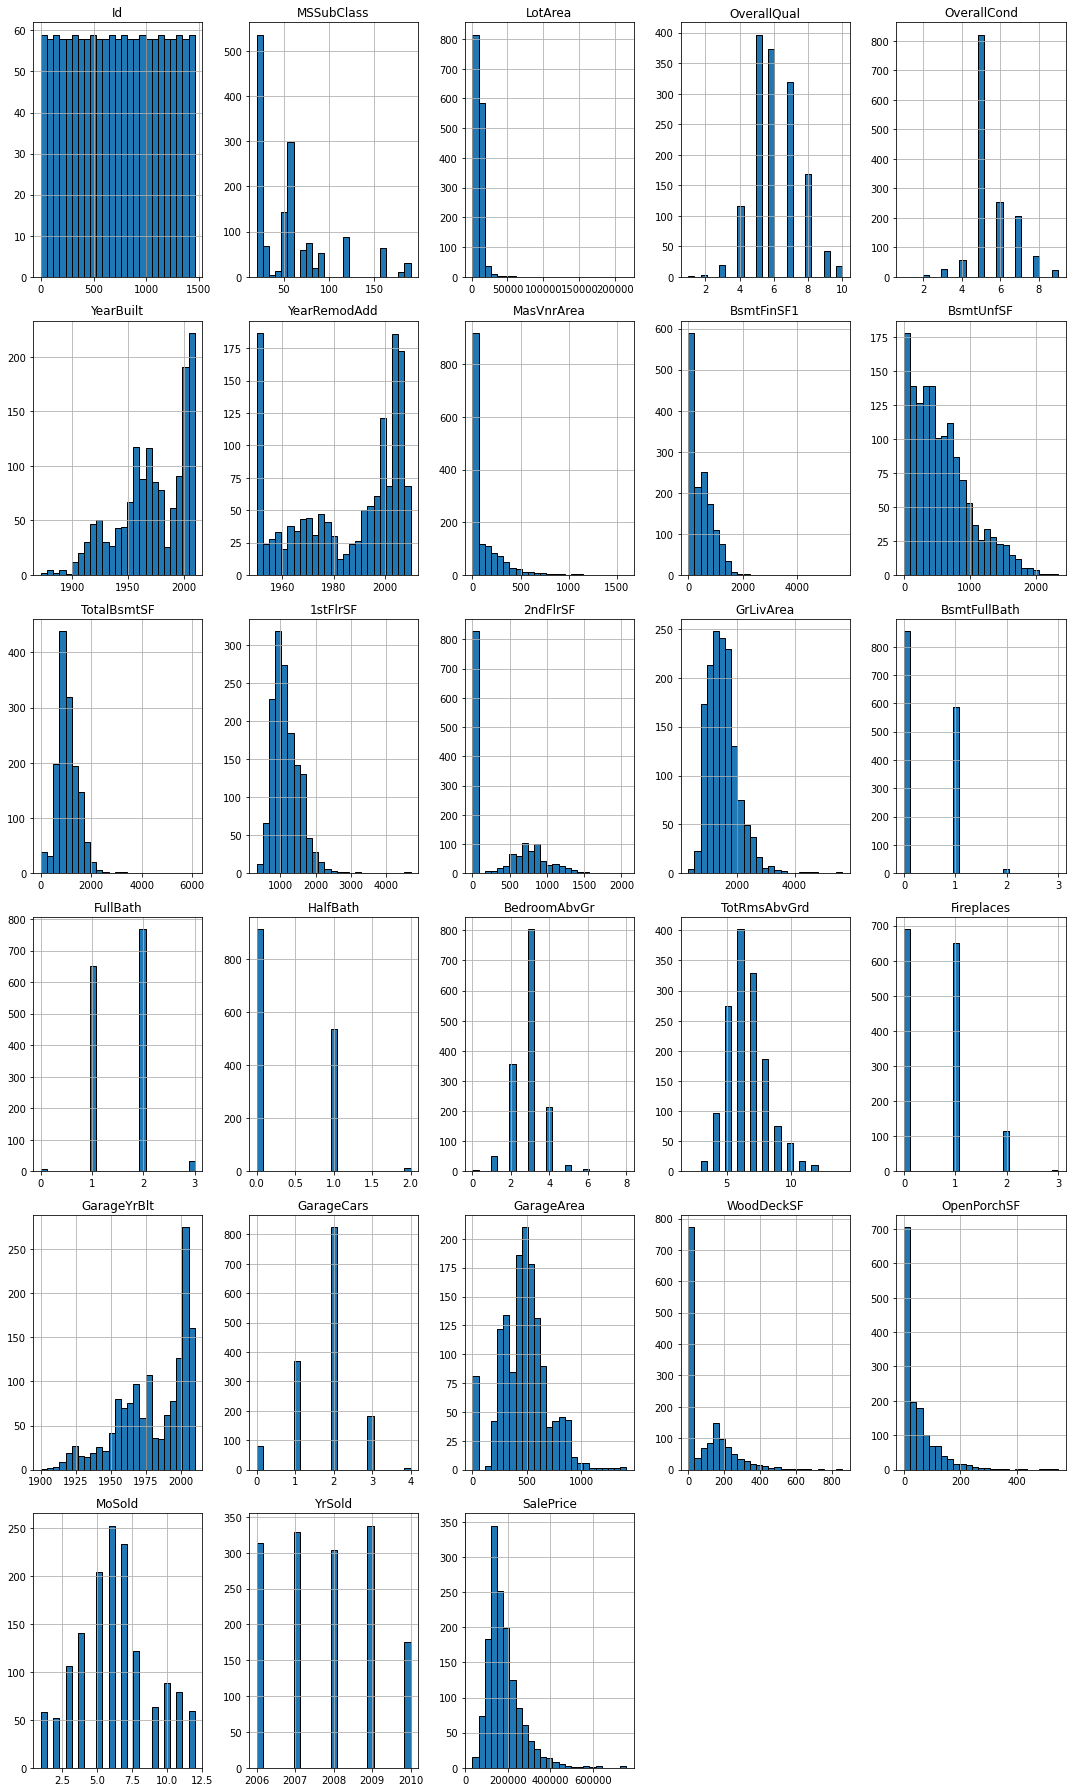

In [37]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

As we can see in some features still one value accounts for most of the data variability. Let's compute and visualize this.

<AxesSubplot:xlabel='Feature'>

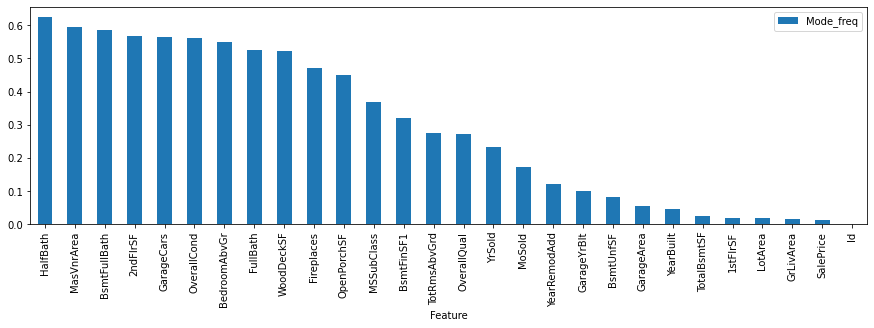

In [102]:
#Fetch the frequency of the mode for each numeric feature
freq_mode = [ df[col].value_counts(normalize=True).iloc[0] for col in df.select_dtypes(include=['number']) ]
#convert to dataframe for visualization purposes
df_freq['Feature']=df.select_dtypes(include=['number']).columns
df_freq['Mode_freq'] = freq_mode
#sort and reset index
df_freq.sort_values(by=['Mode_freq'], ascending=False, inplace=True)
#df_freq.reset_index(drop=True)
df_freq=df_freq.set_index('Feature')

df_freq.plot.bar(figsize=(15, 4))

MSZoning        0.788356
RoofStyle       0.781507
LotConfig       0.720548
BsmtExposure    0.678767
GarageType      0.651370
LotShape        0.633562
ExterQual       0.620548
MasVnrType      0.597260
HeatingQC       0.507534
KitchenQual     0.503425
HouseStyle      0.497260
BsmtQual        0.469863
GarageFinish    0.469863
Foundation      0.443151
Exterior1st     0.352740
Exterior2nd     0.345205
BsmtFinType1    0.319863
Neighborhood    0.154110
dtype: float64

<AxesSubplot:>

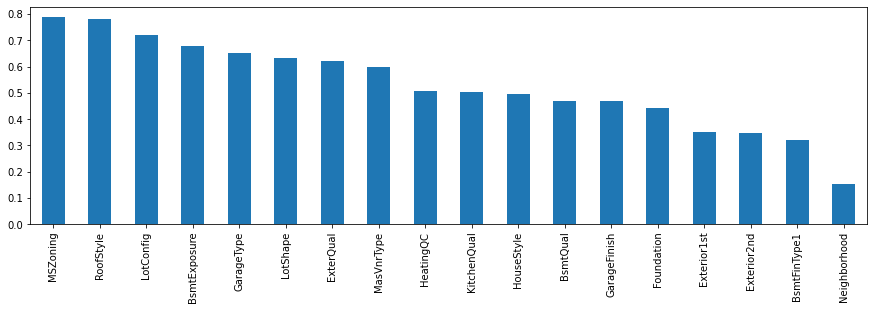

In [220]:
# Collects for each feature the most frequent entry
most_frequent_entry = df.select_dtypes(exclude=["number"]).mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df.select_dtypes(exclude=["number"]).eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the features with the highest ratio of singular value content
display(df_freq)

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4))

Choosing a cut-off point of 80% was arbitral. Looking at the plots